/var/folders/4_/626_qvf53hn3c5yvb9qh47yh0000gn/T/ipykernel_69480/2578467507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['throughput'][i] /= base_tp_val


[Text(0.5, 1.0, 'Comparing Redis Scaling Baremetal vs. Virtualized')]

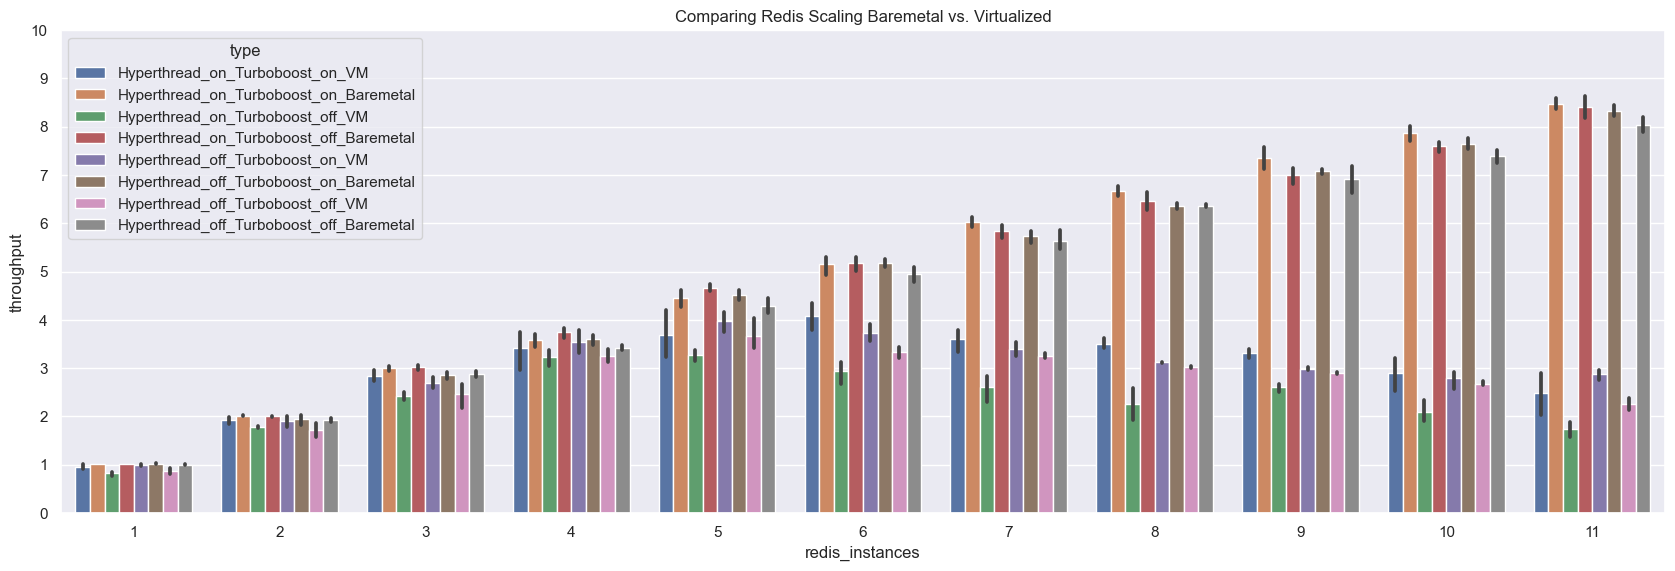

In [1]:
import pandas as pd
import seaborn as sb

sb.set_theme(style="darkgrid")
sb.color_palette("Set2")
sb.set(rc={'figure.figsize':(20.7,6.27)})

def preprocess_data(data: pd.DataFrame):
    base_tp_val = 0
    for i in range(len(data['redis_instances'])):
        if i == 0:
            base_tp_val = float(data['throughput'][i])
        
        data['throughput'][i] /= base_tp_val

df = pd.read_csv("redis_results.csv")
preprocess_data(df)

g = sb.barplot(data=df, x='redis_instances', y='throughput', hue='type')
#g.set_xticks(range(len(df)))
g.set_yticks(range(0, 11))
g.set(title='Comparing Redis Scaling Baremetal vs. Virtualized')